<a href="https://colab.research.google.com/github/RiyaDaphal/Heart-Disease-Analysis/blob/main/Analysis_of_Cardiovascular_Risk_Factors_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 1. Load the dataset
df=pd.read_csv("heart.csv")

In [ ]:
# 2. Initial Inspection
print("--- Dataset Shape ---")
print(df.shape)

--- Dataset Shape ---
(918, 12)


In [ ]:
print("\n--- Column Types ---")
print(df.dtypes)


--- Column Types ---
Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object


In [ ]:
# 3. Handling Missing Values
missing_values = df.isnull().sum()
print("\n--- Missing Values Per Column ---")
print(missing_values)


--- Missing Values Per Column ---
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [ ]:
# 4. Cleaning: Removing duplicates
initial_count = len(df)
df.drop_duplicates(inplace=True)
print(f"\nRemoved {initial_count - len(df)} duplicate rows.")


Removed 0 duplicate rows.


In [ ]:
# 5. Data Transformation
# Changing 'Sex' from 0/1 to 'Female'/'Male' makes your charts readable
if 'Sex' in df.columns:
    df['Sex'] = df['Sex'].replace({0: 'Female', 1: 'Male'})

In [ ]:
# 6. Filtering Outliers (Optional but looks very advanced)
df = df[df['Cholesterol'] > 0]

In [ ]:
print("\n--- Data Cleaning Complete ---")
df.head()


--- Data Cleaning Complete ---


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


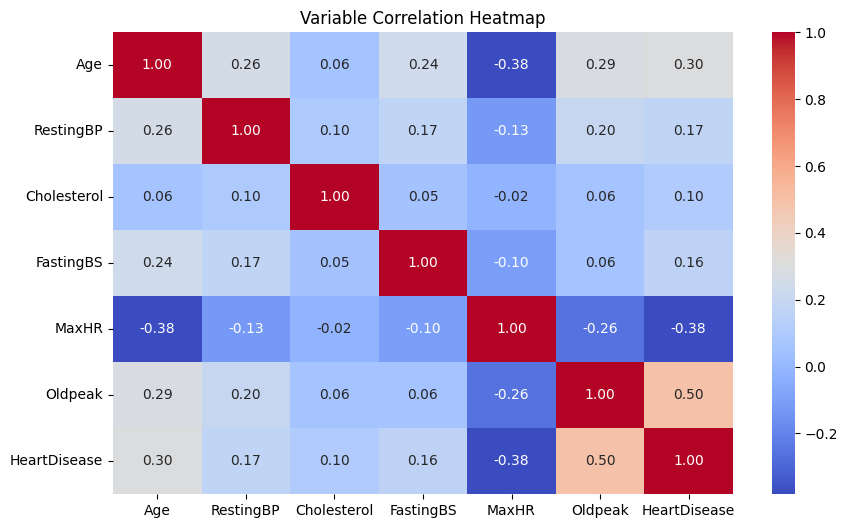

In [ ]:
corr = df.corr(numeric_only=True) # 1. Calculate the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f") # 2. Create the heatmap
plt.title('Variable Correlation Heatmap') # 3. Add a title
plt.show()

In [ ]:
# Set the visual style (makes charts look modern and clean)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

Text(0, 0.5, 'Number of Patients')

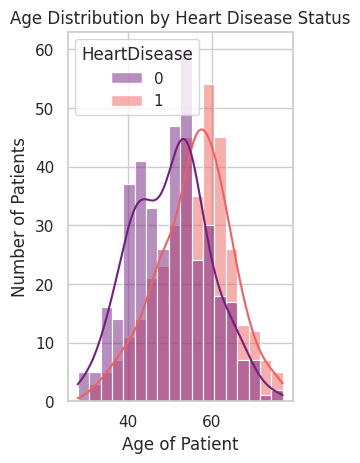

In [ ]:
# 1. Chart: Age Distribution vs Heart Disease
# This shows: "At what age does the risk start to climb?"
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age', hue='HeartDisease', kde=True, palette='magma')
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age of Patient')
plt.ylabel('Number of Patients')

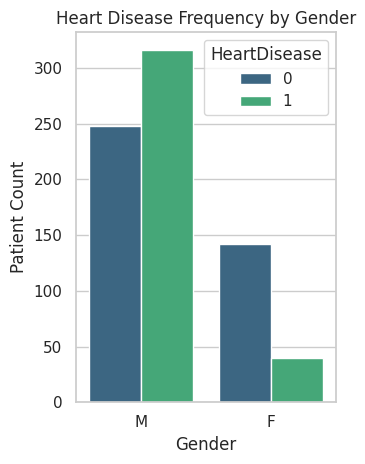

In [ ]:
# 2. Chart: Sex vs Heart Disease (Categorical Analysis)
# This shows: "Is there a gender-based trend in the data?"
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Sex', hue='HeartDisease', palette='viridis')
plt.title('Heart Disease Frequency by Gender')
plt.xlabel('Gender')
plt.ylabel('Patient Count')

plt.tight_layout()
plt.show()